## PuLP — Python library for linear optimization

Linear programming is a fundamental optimization technique that’s been used for decades. Linear programming is a set of techniques used in mathematical programming, sometimes called mathematical optimization, TP SOLVE SYSTEMS OF LINEAR EQUATIONS AND INEQUALITIES while maximizing or minimizing some linear function. 

Mixed-integer linear programming is an extension of linear programming. It handles problems in which at least one variable takes a discrete integer rather than a continuous value. Although mixed-integer problems look similar to continuous variable problems at first sight, they offer significant advantages in terms of flexibility and precision.

Mixed-integer linear programming allows you to overcome many of the limitations of linear programming. You can approximate non-linear functions with piecewise linear functions, use semi-continuous variables, model logical constraints, and more. It’s a computationally intensive tool, but the advances in computer hardware and software make it more applicable every day.

linear programming requires computationally intensive work with (often large) matrices. Such libraries are called solvers. The Python tools are just wrappers around the solvers.

Several free Python libraries are specialized to interact with linear or mixed-integer linear programming solvers:

    SciPy - Optimization and Root Finding
    PuLP
    GLPK
    LP Solve
    CLP
    CBC
    CVXOPT
    SCIP with PySCIPOpt
    Gurobi Optimizer
    CPLEX
    XPRESS
    MOSEK

Basically, when you define and solve a model, you use Python functions or methods to call a low-level library that does the actual optimization job and returns the solution to your Python object.

`SciPy` is straightforward to set up. Once you install it, you’ll have everything you need to start. Its subpackage scipy.optimize can be used for both linear and nonlinear optimization.

`PuLP` allows you to choose solvers and formulate problems in a more natural way. The default solver used by PuLP is the COIN-OR Branch and Cut Solver (CBC). It’s connected to the COIN-OR Linear Programming Solver (CLP) for linear relaxations and the COIN-OR Cut Generator Library (CGL) for cuts generation.

`GLPK` - Another open source package

`GNU` - Another great open source solver is the GNU Linear Programming Kit (GLPK). 
Some well-known and very powerful commercial and proprietary solutions are `Gurobi, CPLEX, and XPRESS`.
Besides offering flexibility when defining problems and the ability to run various solvers, PuLP is less complicated to use than alternatives like `Pyomo or CVXOPT`, which require more time and effort to master.

`Gurobi` - Gurobi Optimization is a company that offers a very fast commercial solver with a Python API. Some of these libraries, like Gurobi, include their own Python wrappers. Others use external wrappers. For example, you saw that you can access CBC and GLPK with PuLP.

### Simple problem:

maximize: z = x + 2y
subject to: 
        
        2x + y <= 20
        -4x + 5y <= 10
        -x + 2y >= -2
        x >= 0
        y >= 0
        -x + 5y = 15  # Equality Constraint
        
        
Here, 
Objectvie function/Cost function is Z
decision variables are X and Y
inequality constraints are condition/EQUATIONS subject to
Solution area is called the feasible region, and its points are feasible solutions
feasible linear programming problems because they have bounded feasible regions and finite solutions

Note that z is linear. You can imagine it as a plane in three-dimensional space. This is why the optimal solution must be on a vertex, or corner, of the feasible region. Sometimes a whole edge of the feasible region, or even the entire region, can correspond to the same value of z. In that case, you have many optimal solutions.

If you insert the demand that all values of x must be integers, then you’ll get a mixed-integer linear programming problem, and the set of feasible solutions will change once again

Feasible and Bounded solution: has a finite and bounded solution
Unbounded solution: A linear programming problem is unbounded if its feasible region isn’t bounded and the solution is not finite.
Infeasible solution: A linear programming problem is infeasible if it doesn’t have a solution. This usually happens when no solution can satisfy all constraints at once.
Relaxing the problem: Dropping constraints out of a problem is called relaxing the problem.

## Resource Allocation Problem

Say that a factory produces four different products, and that the daily produced amount of the first product is x₁, the amount produced of the second product is x₂, and so on. The goal is to determine the profit-maximizing daily production amount for each product, bearing in mind the following conditions:

    1. The profit per unit of product is $20, $12, $40, and $25 for the first, second, third, and fourth product, respectively.

    2. Due to manpower constraints, the total number of units produced per day can’t exceed fifty.

    3. For each unit of the first product, three units of the raw material A are consumed. Each unit of the second product requires two units of the raw material A and one unit of the raw material B. Each unit of the third product needs one unit of A and two units of B. Finally, each unit of the fourth product requires three units of B.

    4. Due to the transportation and storage constraints, the factory can consume up to one hundred units of the raw material A and ninety units of B per day.

    5. product amounts can’t be negative, so all decision variables must be greater than or equal to zero.
    


PuLP has a more convenient linear programming API than SciPy. You don’t have to mathematically modify your problem or use vectors and matrices. Everything is cleaner and less prone to errors.

# Simple Problem

Our problem is:
    
    maximize: Z = x + 2y
    Subject to:
        2x+y<=20
        -4x+5y<=10
        -x+2y>=-2
        -x+5y=15
        x>=0
        y>=0

In [3]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable

In [4]:
# Create the model
model = LpProblem(name="resource-allocation-problem", sense=LpMaximize)

In [5]:
# define the decision variables as instances of the LpVariable class
# default lower_bound is negative infinity so need to mention zero
x = LpVariable(name="x", lowBound=0)
y = LpVariable(name="y", lowBound=0)

In [10]:
# use the variables x and y to create other PuLP objects that represent linear expressions and constraints
"""
When you multiply a decision variable with a scalar or build a linear combination of multiple decision variables, 
you get an instance of pulp.LpAffineExpression that represents a linear expression.
"""

expression = 2 * x + 4 * y
print(type(expression))

<class 'pulp.pulp.LpAffineExpression'>


In [9]:
"""
Similarly, you can combine linear expressions, variables, and scalars 
with the operators ==, <=, or >= to get instances of pulp.LpConstraint 
that represent the linear constraints of your model.
"""

constraint = 2 * x + 4 * y >= 8
print(type(constraint))

<class 'pulp.pulp.LpConstraint'>


In [11]:
# create the constraints and objective function as well as to assign them to your model
"""
You can append a constraint or objective to the model with the operator += 
because its class, LpProblem, implements the special method .__iadd__(), 
which is used to specify the behavior of +=

For larger problems, 
it’s often more convenient to use lpSum() with a list or other sequence than to repeat the + operator. 
"""


model += (2 * x + y <= 20, "red_constraint")
model += (4 * x - 5 * y >= -10, "blue_constraint")
model += (-x + 2 * y >= -2, "yellow_constraint")
model += (-x + 5 * y == 15, "green_constraint")

obj_func = x + 2 * y
model += obj_func

In [15]:
# see the definition of the model
display(model)

print([i for i in dir(model) if '_' not in i])

resource-allocation-problem:
MAXIMIZE
1*x + 2*y + 0
SUBJECT TO
red_constraint: 2 x + y <= 20

blue_constraint: 4 x - 5 y >= -10

yellow_constraint: - x + 2 y >= -2

green_constraint: - x + 5 y = 15

VARIABLES
x Continuous
y Continuous

['add', 'addConstraint', 'addVariable', 'addVariables', 'assignConsPi', 'assignConsSlack', 'assignStatus', 'assignVarsDj', 'assignVarsVals', 'checkDuplicateVars', 'checkLengthVars', 'coefficients', 'constraints', 'copy', 'deepcopy', 'dummyVar', 'extend', 'fixObjective', 'fromDict', 'fromJson', 'fromMPS', 'getSense', 'infeasibilityGap', 'isMIP', 'lastUnused', 'modifiedConstraints', 'modifiedVariables', 'name', 'noOverlap', 'normalisedNames', 'numConstraints', 'numVariables', 'objective', 'resolve', 'resolveOK', 'restoreObjective', 'roundSolution', 'sense', 'sequentialSolve', 'setObjective', 'setSolver', 'solutionCpuTime', 'solutionTime', 'solve', 'solver', 'sos1', 'sos2', 'startClock', 'status', 'stopClock', 'toDict', 'toJson', 'unusedConstraintName', 'valid', 'variables', 'variablesDict', 'writeLP', 'writeMPS']


In [16]:
# Solve the problem using default solver CBC
"""
.solve() calls the underlying solver, modifies the model object, and returns the integer status of the solution, 
which will be 1 if the optimum is found. For the rest of the status codes
"""
status = model.solve()

In [21]:
# you can get the optimized results as the attributes of the model
print(f"model varibale are: {model.variables()}")
print(f"status: {model.status}, {LpStatus[model.status]}")
print(f"objective: {model.objective.value()}")

for var in model.variables():
    print(f"{var.name}: {var.value()}")
    
for name, constraint in model.constraints.items():
    print(f"{name}: {constraint.value()}")

model varibale are: [x, y]
status: 1, Optimal
objective: 16.8181817
x: 7.7272727
y: 4.5454545
red_constraint: -9.99999993922529e-08
blue_constraint: 18.181818300000003
yellow_constraint: 3.3636362999999996
green_constraint: -2.0000000233721948e-07


In [22]:
"""
To see the solver: The output informs you that the solver is CBC. 
You didn’t specify a solver, so PuLP called the default one.
If you want to run a different solver, then you can specify it as an argument of .solve(). 
For example, if you want to use GLPK and already have it installed, 
then you can use solver=GLPK(msg=False) in the last line. 
Keep in mind that you’ll also need to import it:
"""

model.solver

# pip install glpk
# from pulp import GLPK
# status = model.solve(solver=GLPK(msg=False))

In [23]:
"""
You can also use PuLP to solve mixed-integer linear programming problems. 
To define an integer or binary variable, just pass cat="Integer" or cat="Binary" to LpVariable. 
Everything else remains the same
"""

x = LpVariable(name="x", lowBound=0, cat="Integer")
# now solution of x will be an integer only.

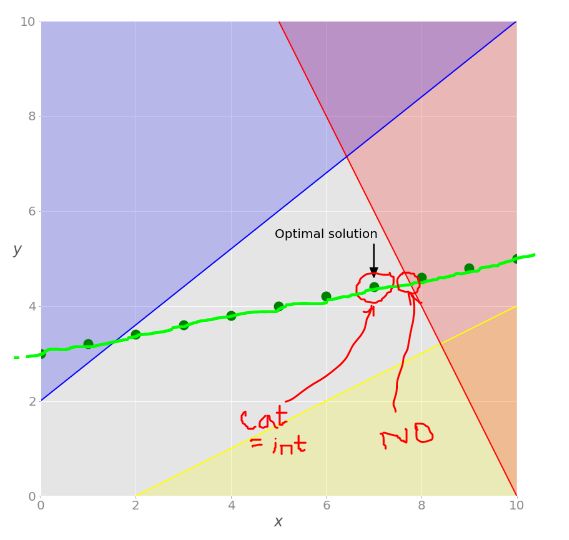

# Resource allocation problem

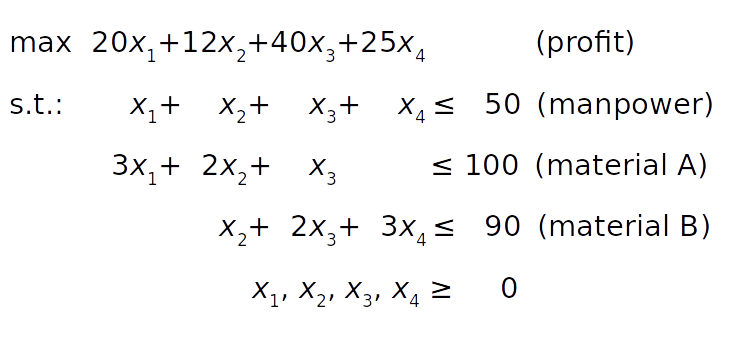

In [24]:
# Define the model
model = LpProblem(name="resource-allocation", sense=LpMaximize)

# Define the decision variables
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 5)}

# Add constraints
model += (lpSum(x.values()) <= 50, "manpower")
model += (3 * x[1] + 2 * x[2] + x[3] <= 100, "material_a")
model += (x[2] + 2 * x[3] + 3 * x[4] <= 90, "material_b")

# Set the objective
model += 20 * x[1] + 12 * x[2] + 40 * x[3] + 25 * x[4]

# Solve the optimization problem
status = model.solve()

# Get the results
print(f"status: {model.status}, {LpStatus[model.status]}")
print(f"objective: {model.objective.value()}")

for var in x.values():
    print(f"{var.name}: {var.value()}")

for name, constraint in model.constraints.items():
    print(f"{name}: {constraint.value()}")

status: 1, Optimal
objective: 1900.0
x1: 5.0
x2: 0.0
x3: 45.0
x4: 0.0
manpower: 0.0
material_a: -40.0
material_b: 0.0


In [25]:
"""
Say the factory can’t produce the first and third products in parallel due to a machinery issue. 
What’s the most profitable solution in this case?

Now you have another logical constraint: if x₁ is positive, then x₃ must be zero and vice versa. 
This is where binary decision variables are very useful. 
You’ll use two binary decision variables, y₁ and y₃, that’ll denote 
if the first or third products are generated at all:
"""

model = LpProblem(name="resource-allocation", sense=LpMaximize)

# Define the decision variables
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 5)}
y = {i: LpVariable(name=f"y{i}", cat="Binary") for i in (1, 3)}

# Add constraints
model += (lpSum(x.values()) <= 50, "manpower")
model += (3 * x[1] + 2 * x[2] + x[3] <= 100, "material_a")
model += (x[2] + 2 * x[3] + 3 * x[4] <= 90, "material_b")

M = 100
model += (x[1] <= y[1] * M, "x1_constraint")
model += (x[3] <= y[3] * M, "x3_constraint")
model += (y[1] + y[3] <= 1, "y_constraint")

# Set objective
model += 20 * x[1] + 12 * x[2] + 40 * x[3] + 25 * x[4]

# Solve the optimization problem
status = model.solve()

print(f"status: {model.status}, {LpStatus[model.status]}")
print(f"objective: {model.objective.value()}")

for var in model.variables():
    print(f"{var.name}: {var.value()}")

for name, constraint in model.constraints.items():
    print(f"{name}: {constraint.value()}")

status: 1, Optimal
objective: 1800.0
x1: 0.0
x2: 0.0
x3: 45.0
x4: 0.0
y1: 0.0
y3: 1.0
manpower: -5.0
material_a: -55.0
material_b: 0.0
x1_constraint: 0.0
x3_constraint: -55.0
y_constraint: 0.0


# References:

    https://brilliant.org/wiki/linear-programming/
    https://coin-or.github.io/pulp/